# Bangalore housing reality report

## Location: Electronic city

### The notebook summarises the exploratory data analysis tasks carried out for understanding the housing prices in Electronic city

In [1]:
#Importing necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#read the file
df = pd.read_excel("/Users/rakshith/DAFiltered.xlsx")

#Understand the data types present
df.info()

#Obtain the columns
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  109 non-null    int64  
 1   Price       109 non-null    object 
 2   type        109 non-null    object 
 3   bedroom     109 non-null    int64  
 4   Area        109 non-null    int64  
 5   Price/sqft  109 non-null    int64  
 6   Bathroom    109 non-null    int64  
 7   cparking    109 non-null    object 
 8   fStatus     109 non-null    object 
 9   Status      109 non-null    object 
 10  Location    109 non-null    object 
 11  price       109 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 10.3+ KB


Index(['Unnamed: 0', 'Price', 'type', 'bedroom', 'Area', 'Price/sqft',
       'Bathroom', 'cparking', 'fStatus', 'Status', 'Location', 'price'],
      dtype='object')

No missing values found.
Visualising the distribution of continous variables using pair plot seaborn

In [3]:
dataFrameHousingInfo = df.drop(columns= ["Unnamed: 0", "Price"])

dataFrameHousingInfo

,type,bedroom,Area,Price/sqft,Bathroom,cparking,fStatus,Status,Location,price
0,Apartment,2,1032,3200,2,Yes,Unfurnished,Under construction,Electonic city phase 1,33.0
1,Apartment,2,1000,3700,2,Yes,Fully furnished,Ready to move,Electonic city phase 1,37.0
2,Apartment,2,1107,3271,2,Yes,Unfurnished,Ready to move,Electonic city phase 1,36.2
3,Apartment,2,1025,5659,2,No,Semi-furnished,Ready to move,Electonic city phase 1,58.0
4,Apartment,2,1150,5652,2,Yes,Unfurnished,Ready to move,Electonic city phase 1,65.0
...,...,...,...,...,...,...,...,...,...,...
104,Apartment,2,755,4270,1,Yes,Unfurnished,Ready to move,Electonic city phase 1,33.0
105,Villa,3,2500,7400,3,No,Semi-furnished,Ready to move,Electonic city phase 1,185.0
106,Apartment,2,1000,5800,2,Yes,Unfurnished,Ready to move,Electonic city phase 2,58.0
107,Apartment,2,1395,6308,2,Yes,Unfurnished,Ready to move,Electonic city phase 2,88.0


### Utility Functions

In [4]:
def configureGraph(axis, plot, xLabelTitle, xLabelSize, yLabelTitle,
                   yLabelSize, showGrid, graphTitle, titleSize = 20):
    try:
        configureGraphForNonFacets(axis, xLabelTitle, xLabelSize, yLabelTitle,
                                   yLabelSize, graphTitle, titleSize)
    except AttributeError:
        configureGraphForFacets(axis, plot, xLabelTitle, xLabelSize,
                                yLabelTitle, yLabelSize, graphTitle, titleSize)
    if showGrid:
        plot.grid()


def configureGraphForNonFacets(axis, xLabelTitle, xLabelSize, yLabelTitle,
                               yLabelSize, graphTitle, titleSize = 20):
    axis.set_title(graphTitle, size = titleSize, weight='bold')
    axis.set_xlabel(xLabelTitle, size=xLabelSize)
    axis.set_ylabel(yLabelTitle, size=yLabelSize)


def configureGraphForFacets(axis, plot, xLabelTitle, xLabelSize, yLabelTitle,
                            yLabelSize, graphTitle, titleSize = 20):
    axis.set_axis_labels(x_var=xLabelTitle,
                         y_var=yLabelTitle,
                         fontsize=xLabelSize)
    if graphTitle != "":
        plot.title(graphTitle,fontsize = titleSize)

### Data Preprocessing

In [30]:
#Removing any duplicate records
dataFrameHousingInfo.drop_duplicates(inplace = True)

#checking for null values
dataFrameHousingInfo.isna().sum()


type          0
bedroom       0
Area          0
Price/sqft    0
Bathroom      0
cparking      0
fStatus       0
Status        0
Location      0
price         0
dtype: int64

In ideal cases we split the data as train and test data, however in this project given that the data points are less and we seek to showcase only **Exploratory Data Analysis**, we will not split the data and instead use the entire dataset for analysis.

##### Performing Exploratory Data Analysis on the training dataset

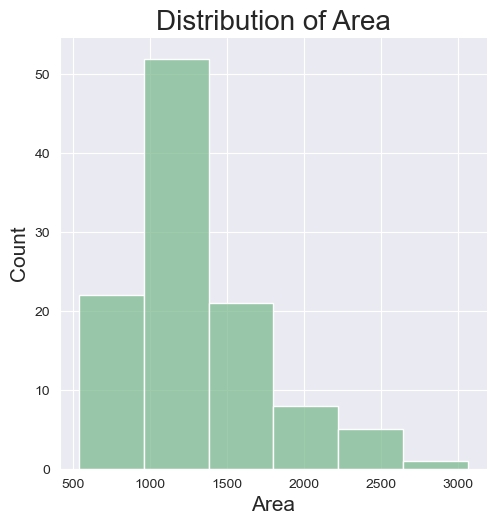

In [32]:
#Histogram for Area
sns.set_style('darkgrid')
sns.set_palette('crest')

ax = sns.displot(data = dataFrameHousingInfo, x = "Area", bins = 6)

configureGraph(ax, plt, 'Area', 15, 'Count', 15, False, "Distribution of Area")

plt.rcParams['figure.figsize']=(6,7)

plt.show()

We see the histogram is left skewed. A majority of the houses have carpet area in the range of 1000 - 1500 sq meters.

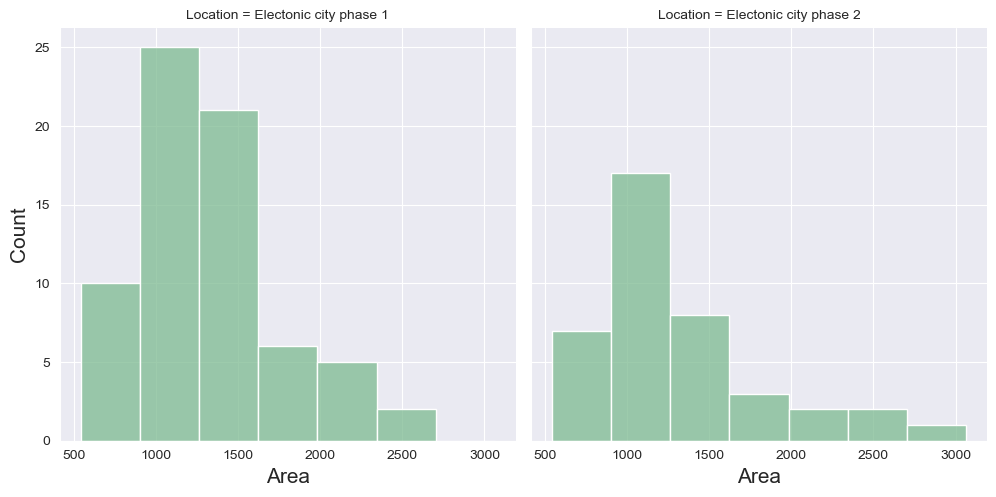

In [33]:
#Histogram for Area distribution for each phase
#If title does not fix try using bar plots instead 
ax = sns.displot(dataFrameHousingInfo, x = "Area", col = "Location", bins = 7)

configureGraphForFacets(ax, plt,"Area", 15, "Count", 15, "")

plt.rcParams['figure.figsize']=(6,7)

plt.show()

We observe, phase 1 has most of the houses with a lower carpet area, these might be the apartments.
Phase 2 however mostly has houses with a higher carpet area, these might be the villas.

 Creating a scatter plot to understand the variation in price based on area with type of house as a parameter

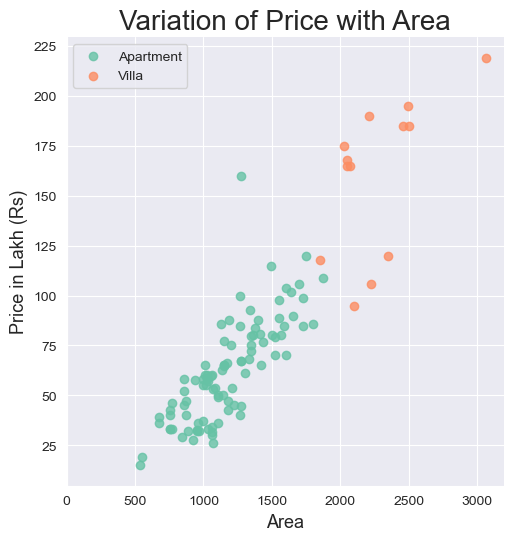

In [43]:
sns.reset_defaults()
sns.set_style('darkgrid')

graph = sns.lmplot(x = 'Area',
                   y = 'price',
                   hue = 'type',
                   data = dataFrameHousingInfo,
                   fit_reg = False,
                   legend = False,
                   palette ="Set2",
                  )

configureGraph(graph, plt, "Area", 13, "Price in Lakh (Rs)", 13, False,"Variation of Price with Area")

plt.xlim(0)

graph.fig.get_axes()[0].legend(loc='upper left')

We notice that with an increase in area the price of the house also increases. These exists a linear relationship
between the two.

A villa in general is much more expensive than a apartment, with some Villas costing as much as 200 Lakh Rs.


Creating bar plots to explore number of flats of different types.

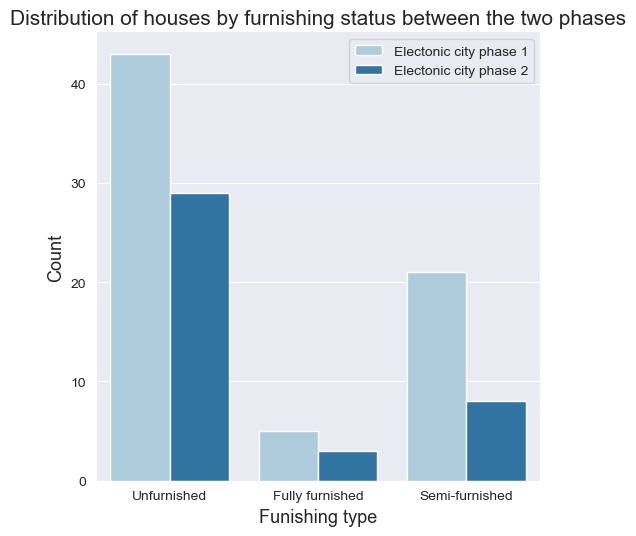

In [18]:
graph = sns.catplot(x='fStatus',
                    hue='Location',
                    kind="count",
                    data=dataFrameHousingInfo,
                    ci=None,
                   legend = False,
                   palette = "Paired")

configureGraph(
    graph, plt, "Funishing type", 13, "Count", 13, False,
    "Distribution of houses by furnishing status between the two phases", 15)

graph.fig.get_axes()[0].legend(loc='upper right')

Creating barplots to understand price distribution for various house furnishing types

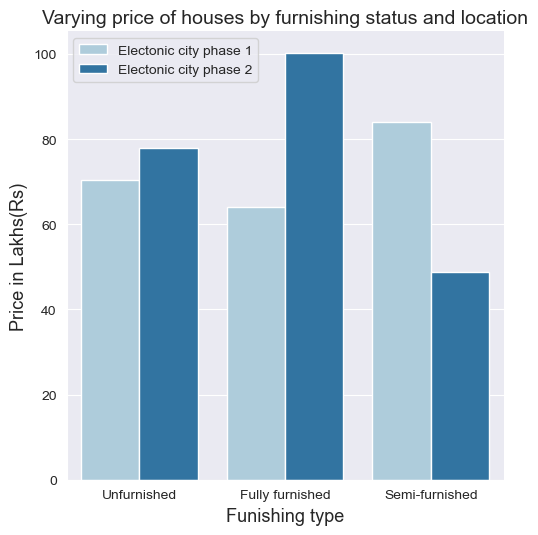

In [19]:
graph = sns.catplot(x="fStatus",
                    y="price",
                    hue="Location",
                    data=dataFrameHousingInfo,
                    ci=False,
                   palette= "Paired", 
                   kind= "bar",
                   legend = False)
configureGraph(
    graph, plt, "Funishing type", 13, "Price in Lakhs(Rs)", 13, False,
    "Varying price of houses by furnishing status and location", 14)
graph.fig.get_axes()[0].legend(loc='upper left')

Plotting box plot for number of bedrooms and price to understand the distribution

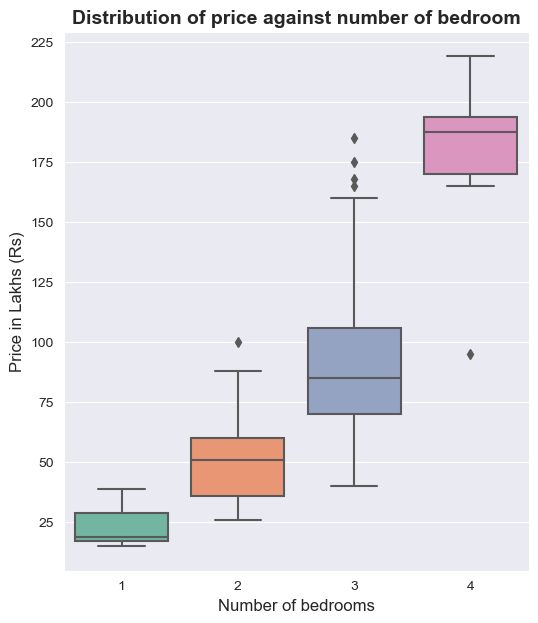

In [34]:

graph = sns.boxplot(x=dataFrameHousingInfo["bedroom"],
                    y=dataFrameHousingInfo["price"], palette= "Set2")

configureGraph(graph, plt, "Number of bedrooms", 12, "Price in Lakhs (Rs)", 12, False,
                "Distribution of price against number of bedroom", 14)

Plotting a bar graph for understanding how house status of under construction or ready to move affects the price

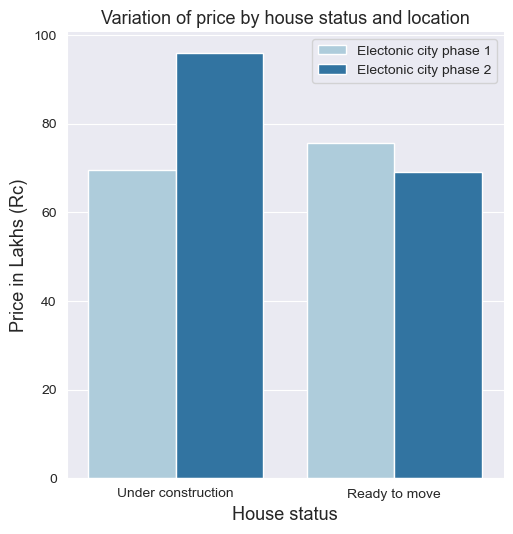

In [26]:
graph = sns.catplot(x="Status",
                    y="price",
                    data=dataFrameHousingInfo,
                    kind="bar",
                    ci=False,
                    hue="Location",
                    legend=False,
                   palette= "Paired")

configureGraph(graph, plt, "House status", 13, "Price in Lakhs (Rc)", 13,
               False, "Variation of price by house status and location", 13)

graph.fig.get_axes()[0].legend(loc='upper right')

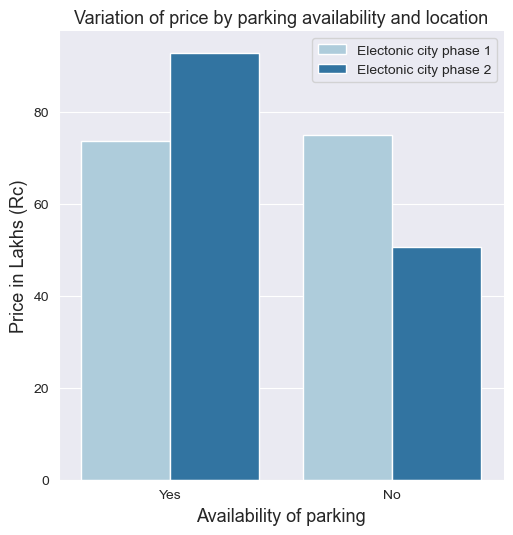

In [35]:
graph = sns.catplot(x="cparking",
                    y="price",
                    data=dataFrameHousingInfo,
                    kind="bar",
                    ci=False,
                    hue="Location",
                    legend=False,
                   palette= "Paired")

configureGraph(graph, plt, "Availability of parking", 13, "Price in Lakhs (Rc)", 13,
               False, "Variation of price by parking availability and location", 13)

graph.fig.get_axes()[0].legend(loc='upper right')